In [1]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
df = pd.read_csv("tmdb-movies.csv", sep=",", names=None, skiprows=None)
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### mask 方式选择数据
mask 的方式，其实就是掩码的方式，它是通过真假值来判断是否可以选择数据——也就是说 “单元格” 为假的情况下，该单元格就不需要选择，反之即选择。下面通过两个列表的方式来模拟掩码选择数据。

In [3]:
values= [1, 2, 3, 4]
conditions = [True, False, True, True]
result = []
for value, condition in zip(values, conditions):
    if condition:
        result.append(value)

print(result)

[1, 3, 4]


上面的方式就是就是通过真假值判断，来排除了第二个数据。另外如果对网络熟悉的同学，可以想一下子掩码的作用(255.255.255.0)。使用这种掩码的重要方式就是你能够通过合适的方式去创建，真假值。一种是通过列内的值去比较，另外还有使用 query 方法。当然这里的方法有很多种，主要是看怎么创建

In [4]:
# 第一种常见的方式，直接使用列
df[(df["director"] == "George Miller") & (df["vote_average"] > 6.0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
7827,9659,tt0079501,2.012021,400000,100000000,Mad Max,Mel Gibson|Joanne Samuel|Hugh Keays-Byrne|Stev...,NaN,George Miller,The Maximum Force Of The Future,...,"In a dystopic future Australia, a vicious bike...",93,Adventure|Action|Thriller|Science Fiction,Kennedy Miller Productions|Mad Max Films|Cross...,4/12/79,667,6.5,1979,1.201822e+06,3.004554e+08
8364,2007,tt0104756,0.234375,0,7286388,Lorenzo's Oil,Susan Sarandon|Nick Nolte|Peter Ustinov|Ann He...,NaN,George Miller,Some people make their own miracles.,...,Lorenzo Odone was a normal child until the age...,135,Drama,Universal Pictures,12/30/92,52,6.2,1992,0.000000e+00,1.132322e+07
8379,8810,tt0082694,1.248748,2000000,24600832,Mad Max 2,Mel Gibson|Bruce Spence|Michael Preston|Max Ph...,NaN,George Miller,"When all that's left is one last chance, pray ...",...,Max Rockatansky returns as the heroic loner wh...,95,Adventure|Action|Thriller|Science Fiction,Kennedy Miller Productions,12/23/81,501,7.1,1981,4.796382e+06,5.899749e+07
9621,6069,tt0094332,0.624584,0,63766510,The Witches of Eastwick,Jack Nicholson|Cher|Susan Sarandon|Michelle Pf...,NaN,George Miller,Three Beautiful Women. One Lucky Devil.,...,Three single women in a picturesque village ha...,118,Fantasy|Horror|Comedy,Kennedy Miller Productions|The Guber-Peters Co...,6/12/87,152,6.1,1987,0.000000e+00,1.223731e+08


#### 上面的方式就是使用直接列值比较的方式，需要选择出导演为 `George Miller` 的数据且平均分数为 6.0 以上的数据
这里需要注意穿件多条件筛选的时候，需要条件需要括号区分

In [5]:
# 其他方式，这里使用 query
df.query("director == 'George Miller' & vote_average > 6.0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
7827,9659,tt0079501,2.012021,400000,100000000,Mad Max,Mel Gibson|Joanne Samuel|Hugh Keays-Byrne|Stev...,NaN,George Miller,The Maximum Force Of The Future,...,"In a dystopic future Australia, a vicious bike...",93,Adventure|Action|Thriller|Science Fiction,Kennedy Miller Productions|Mad Max Films|Cross...,4/12/79,667,6.5,1979,1.201822e+06,3.004554e+08
8364,2007,tt0104756,0.234375,0,7286388,Lorenzo's Oil,Susan Sarandon|Nick Nolte|Peter Ustinov|Ann He...,NaN,George Miller,Some people make their own miracles.,...,Lorenzo Odone was a normal child until the age...,135,Drama,Universal Pictures,12/30/92,52,6.2,1992,0.000000e+00,1.132322e+07
8379,8810,tt0082694,1.248748,2000000,24600832,Mad Max 2,Mel Gibson|Bruce Spence|Michael Preston|Max Ph...,NaN,George Miller,"When all that's left is one last chance, pray ...",...,Max Rockatansky returns as the heroic loner wh...,95,Adventure|Action|Thriller|Science Fiction,Kennedy Miller Productions,12/23/81,501,7.1,1981,4.796382e+06,5.899749e+07
9621,6069,tt0094332,0.624584,0,63766510,The Witches of Eastwick,Jack Nicholson|Cher|Susan Sarandon|Michelle Pf...,NaN,George Miller,Three Beautiful Women. One Lucky Devil.,...,Three single women in a picturesque village ha...,118,Fantasy|Horror|Comedy,Kennedy Miller Productions|The Guber-Peters Co...,6/12/87,152,6.1,1987,0.000000e+00,1.223731e+08


上面也是使用同样的条件进行了筛选。也可以使用其它方法，例如 where， isnull 等结合 dropna 方法筛选出数据

In [6]:
test1 = pd.DataFrame([[0, 0, 1, 2, 3], [1, 4, 5, 6, 7], [2, 8, 9, 10, 11]], columns=["A", "B", "C", "D", "E"])

test1

,A,B,C,D,E
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11


In [7]:
test1.where(test1!=0)

,A,B,C,D,E
0,NaN,NaN,1,2,3
1,1.0,4.0,5,6,7
2,2.0,8.0,9,10,11


In [8]:
test1.where(test1!=0).dropna()

,A,B,C,D,E
1,1.0,4.0,5,6,7
2,2.0,8.0,9,10,11


In [9]:
test1.where(test1!=0).dropna(axis=1)

,C,D,E
0,1,2,3
1,5,6,7
2,9,10,11


上面的方式就是结合了 where 选择条件和 dropna 的方式来排除数据 0

#### 创建 Boolean 值的 Series 数据类型筛选数据或者赋值
思路是使用将数据的转换为逻辑值，同时可以使用复合逻辑结构的方式来创建一个新的 `Series`。之后使用 `apply` 的 `broadcasting` 的方式，可以进行创建新数据

In [10]:
((df["director"] == "George Miller") & (df["vote_average"] > 6.0))[:10]

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [11]:
((df["director"] == "George Miller") & (df["vote_average"] > 6.0)). \
    apply(lambda x: "GM > 6" if x else "GM < 6")[:10]

0    GM < 6
1    GM > 6
2    GM < 6
3    GM < 6
4    GM < 6
5    GM < 6
6    GM < 6
7    GM < 6
8    GM < 6
9    GM < 6
dtype: object

### 可视化的简单说明
对可视化图形的理解：
1. 数据类型对数据可视化的影响
2. 常见可视化图形的优缺点

在开始可视化分析的时候，需要了解主要的以上两点。首先开始从数据类型上来说，首先开始使用的是 `category` 数据类型，对这类数据来说主要是通过计数来表现数据，所以需要使用条形图来表现数据

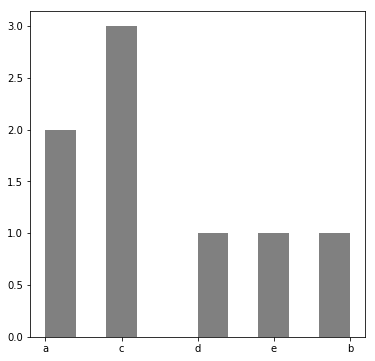

In [12]:
# 数据类型影响数据表达，另外就是传入的绘图参数是 `array_like` 的数据就可以使用
test = ["a", "a", "c", "c", "d", "e", "c" , "b"]
plt.figure(figsize=(6,6))
plt.hist(test, color="grey")
plt.show()

### 参数发散
scatter 绘图中 x 和 y 参数解释 array_like, shap(n,)，以及 c 参数解释 color, sequence, or sequence of color, optional, default: ‘b’

可以利用以上的参数信息对图形进行调整，首先从数据类型发散来说，上面的图中使用的是列表类型同样绘制出了条形图。下面将从颜色方面来分析，利用 y 值大小创建了颜色序列进行绘图以凸显数值差异；之后从 x 的数值差异，筛选出大小数据。两次使用了 scatter 绘图，但是图形标记差异来，表现 x 数值差异

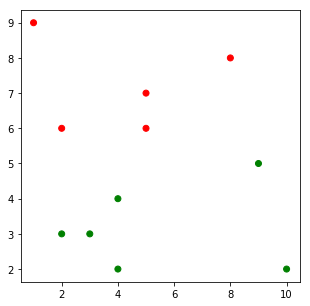

In [13]:
x = pd.Series([1, 2, 3, 4, 5, 4, 2, 5, 10, 8, 9])
y = pd.Series([9, 6, 3, 2, 6, 4, 3, 7, 2, 8, 5])
c = y.apply(lambda x: "r" if x > 5 else "g")

plt.figure(figsize=(5, 5))
plt.scatter(x, y, c=c)
plt.show()

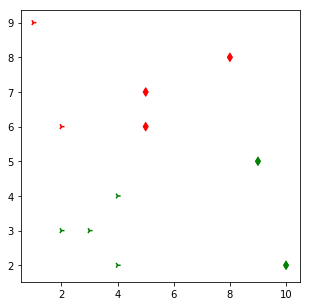

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(x[x<5], y[x<5], c=c[x<5], marker="4")
plt.scatter(x[x>=5], y[x>=5], c=c[x>=5], marker="d")
plt.show()